# 取引履歴のデータ分析

In [1]:
import os
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
matplotlib.use("TkAgg")

In [3]:
current_dir = %pwd
timestamp = os.path.basename(current_dir)

In [4]:
import sys
sys.path.append('/home/tsu-nera/repo/bakuchi/')
%cd '../../'

/home/tsu-nera/repo/bakuchi


In [5]:
from src.utils.trade_analysis import TradeAnalysis

%reload_ext autoreload
%autoreload 2

File doesn't exist 


In [6]:
ta = TradeAnalysis(timestamp)

In [7]:
ex1_trades = ta.get_coincheck_trades_df()
ex2_trades = ta.get_liquid_trades_df()

In [8]:
len(ex1_trades), len(ex2_trades)

(16, 16)

## トレード結果

In [9]:
ta.display()

トレード情報
-------------------  -------------------
         レコード数                55722
           取引回数                   16
           開始日時  2020-05-05 08:30:58
           終了日時  2020-05-05 13:51:17
        取引時間[H]      0 days 05:20:19
      取引単位[BTC]               0.0051
  利確しきい値[JPY]                 2000
損切りマージン[JPY]                 1000
-------------------  -------------------


トレード結果
-----------  ---------
開始[JPY]        10702
終了[JPY]        15590
利益[JPY]         4888
開始[BTC]     0.022347
終了[BTC]     0.017259
利益[BTC]    -0.005088
開始[TOTAL]      31970
終了[TOTAL]      32178
利益[TOTAL]        208
-----------  ---------


トレード利益
  Bot利益    トレード利益    市場利益
---------  --------------  ----------
      208          -2.397     210.397


## 取引履歴

In [10]:
profit_df = ta.create_profit_df()

In [11]:
profit_df.tail(30)

,ex1_side,ex1_price,ex2_side,ex2_price,profit
timestamp,,,,,
2020-05-05 08:30:58,sell,4821.309,buy,4823.468,-2.159
2020-05-05 08:31:02,buy,4824.994,sell,4818.240,-6.754
2020-05-05 08:49:42,sell,4841.420,buy,4843.852,-2.432
2020-05-05 08:49:48,buy,4837.997,sell,4834.810,-3.187
2020-05-05 08:49:53,buy,4839.992,sell,4836.077,-3.915
2020-05-05 08:50:05,sell,4836.146,buy,4839.910,-3.764
2020-05-05 09:40:56,sell,4839.660,buy,4837.013,2.647
2020-05-05 09:47:49,buy,4843.998,sell,4840.915,-3.083
2020-05-05 10:12:06,sell,4831.516,buy,4832.281,-0.765


In [12]:
round(sum(profit_df.profit), 3)

-35.788

## トレードグラフ

In [13]:
ex1_ticks = ta.get_coincheck_ticks_df()
ex2_ticks = ta.get_liquid_ticks_df()

In [14]:
len(ex1_ticks), len(ex2_ticks)

(55722, 55722)

In [15]:
ex1_bids = ex1_ticks['bid']
ex1_asks = ex1_ticks['ask']
ex2_bids = ex2_ticks['bid']
ex2_asks = ex2_ticks['ask']

fig1, ax1 = ta.get_fig(ex1_bids, ex2_asks)
fig2, ax2 = ta.get_fig(ex2_bids, ex1_asks)

ax1.set_title('coincheck bid/liquid ask')
ax2.set_title('liquid bid/coincheck ask')

Text(0.5, 1, 'liquid bid/coincheck ask')

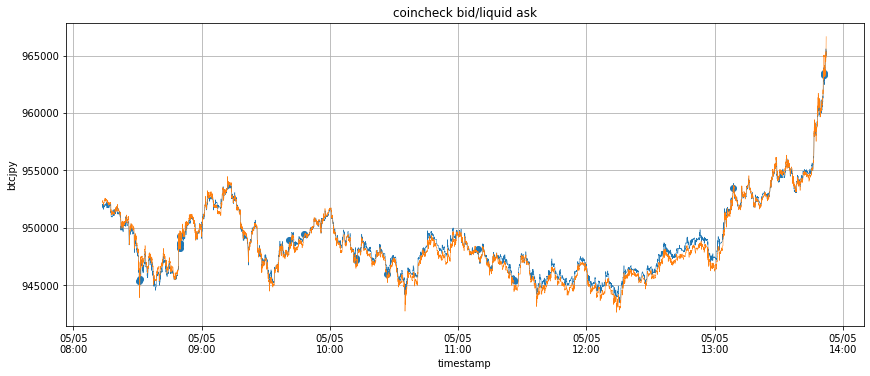

In [16]:
fig1

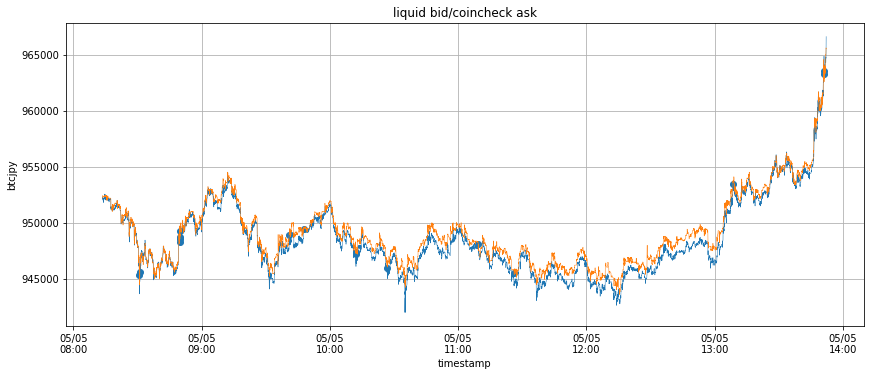

In [17]:
fig2